BPM may refer to: Beats per minute (heart rate), the number of heartbeats detected during one minute
1. We mandate that eyes should be blacked out to protect the identity in any publication, presentation etc.;
2. You cannot share data with anyone else - anyone else who wants to access data has to request it from us;

For each subject, we provide
1. Five videos of each subject (the sub-folder of each video is named as x_1, x_2, x_3, x_4, x_5 where x is the Study ID). Each video corresponds to different trial and has the paired gold-standard PPG signal in ppg.csv and gold-standard heart rate values in hr.csv in the same folder as the video;
2. labels of Study ID, Biological sex (at birth), Ethnicity Race, Fitzpatrick Skin Type in the accompanying excel file.

We removed those subjects who do not agree to share their data outside UCLA.

In [1]:
import numpy as np
import pyVHR as vhr
from pyVHR.analysis.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
# Plotting: set 'colab' for Google Colaboratory, 'notebook' otherwise
vhr.plot.VisualizeParams.renderer = 'notebook'

In [3]:
methods = ['cpu_POS', 'cpu_GREEN', 'cpu_CHROM', 'cpu_PCA', 'cpu_LGI', 'cpu_ICA']

#### UCLA dataset

In [4]:
pipe = Pipeline()
time_dict = {}

for method in methods:
    time, BPM, uncertainty = pipe.run_on_video('data/UCLA/subject1/vid-001.avi', method=method)
    time_dict[method] = (time, BPM)


Processing Video: data/UCLA/subject1/vid-001.avi


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.



BVP extraction with method: cpu_POS

BPM estimation with: welch

...done!


Processing Video: data/UCLA/subject1/vid-001.avi

BVP extraction with method: cpu_GREEN

BPM estimation with: welch

...done!


Processing Video: data/UCLA/subject1/vid-001.avi

BVP extraction with method: cpu_CHROM

BPM estimation with: welch

...done!


Processing Video: data/UCLA/subject1/vid-001.avi

BVP extraction with method: cpu_PCA

BPM estimation with: welch

...done!


Processing Video: data/UCLA/subject1/vid-001.avi

BVP extraction with method: cpu_LGI

BPM estimation with: welch

...done!


Processing Video: data/UCLA/subject1/vid-001.avi

BVP extraction with method: cpu_ICA

BPM estimation with: welch

...done!



In [6]:
ground_truth_file = 'data/UCLA/subject1/subject1/1_1/hr.csv'
ground_truth = np.loadtxt(ground_truth_file, delimiter=',')
len(ground_truth)

1790

In [7]:
fps = 30  # Frames per second
num_frames = len(ground_truth) #1790

# Generate a time axis in seconds based on frame indices
time_axis = np.arange(num_frames) / fps
time_axis

array([0.00000000e+00, 3.33333333e-02, 6.66666667e-02, ...,
       5.95666667e+01, 5.96000000e+01, 5.96333333e+01])

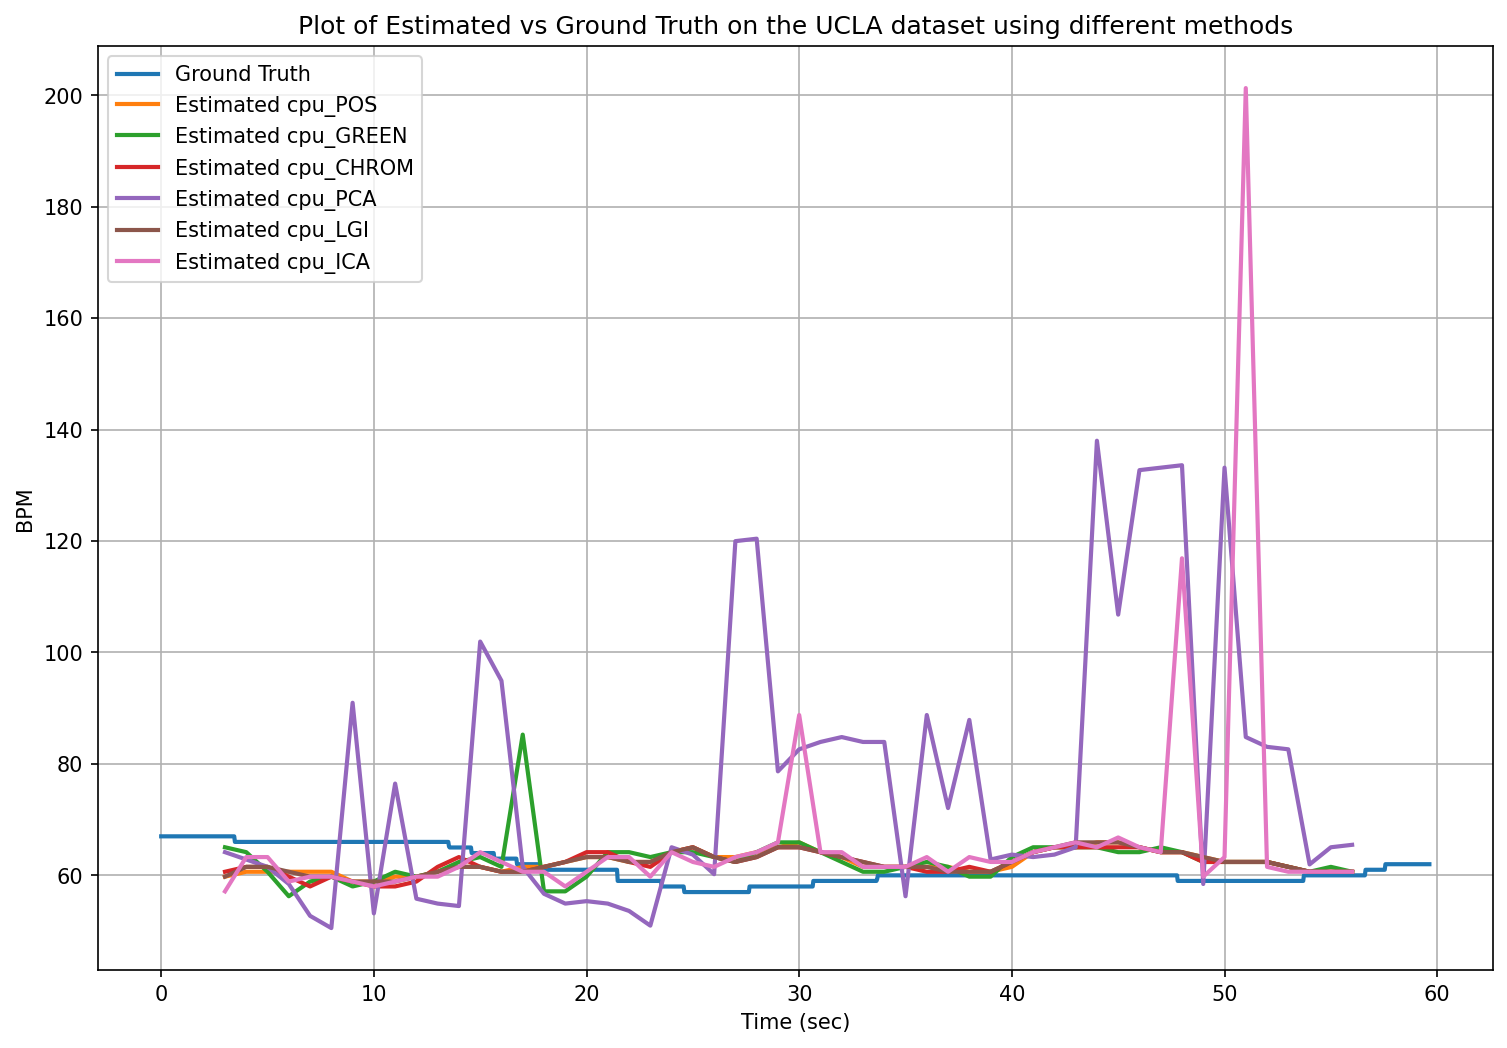

In [8]:
plt.figure(figsize=(12,8), dpi=150)

plt.plot(time_axis, ground_truth, label='Ground Truth', linewidth =2)

for mthd in time_dict:
    #if mthd == 'cpu_ICA':
    plt.plot(time_dict[mthd][0], time_dict[mthd][1], label=f'Estimated {mthd}', linewidth =2)

plt.ylabel("BPM")
plt.xlabel("Time (sec)")
plt.legend()
plt.title("Plot of Estimated vs Ground Truth on the UCLA dataset using different methods")
plt.grid(True)

plt.show()

#### UBFC-rPPG dataset

In [9]:
# -- LOAD A DATASET

dataset_name = 'UBFC2'                      # the name of the python class handling it 
video_DIR = 'data/UBFC-RPPG/'  # dir containing videos
BVP_DIR = 'data/UBFC-RPPG/'    # dir containing BVPs GT

dataset = vhr.datasets.datasetFactory(dataset_name, videodataDIR=video_DIR, BVPdataDIR=BVP_DIR)
allvideo = dataset.videoFilenames

In [10]:
# print the list of video names with the progressive index (idx)
for v in range(len(allvideo)):
  print(v, allvideo[v])

0 data/UBFC-RPPG/subject1/vid.avi


In [20]:
pipe = Pipeline()
time, BPM, uncertainty = pipe.run_on_video(allvideo[0]) #default method is POS


Processing Video: data/UBFC-RPPG/subject1/vid.avi

BVP extraction with method: cpu_POS

BPM estimation with: welch

...done!



In [21]:
videoFileName = dataset.getVideoFilename(video_idx)
print('Video processed name: ', videoFileName)
fps = vhr.extraction.get_fps(videoFileName)
print('Video frame rate:     ',fps)

Video processed name:  data/UBFC-RPPG/subject1/vid.avi
Video frame rate:      29.264106


In [22]:
wsize = 6        # default_value in pipeline.py
video_idx = 0    # index of the video to be processed
fname = dataset.getSigFilename(video_idx)
sigGT = dataset.readSigfile(fname)
bpmGT, timesGT = sigGT.getBPM(wsize)

In [23]:
# Filter value2 accordingly
bpmGT = bpmGT[np.isin(timesGT, time)]

# Filter time2 to include only times present in time1
timesGT = timesGT[np.isin(timesGT, time)]

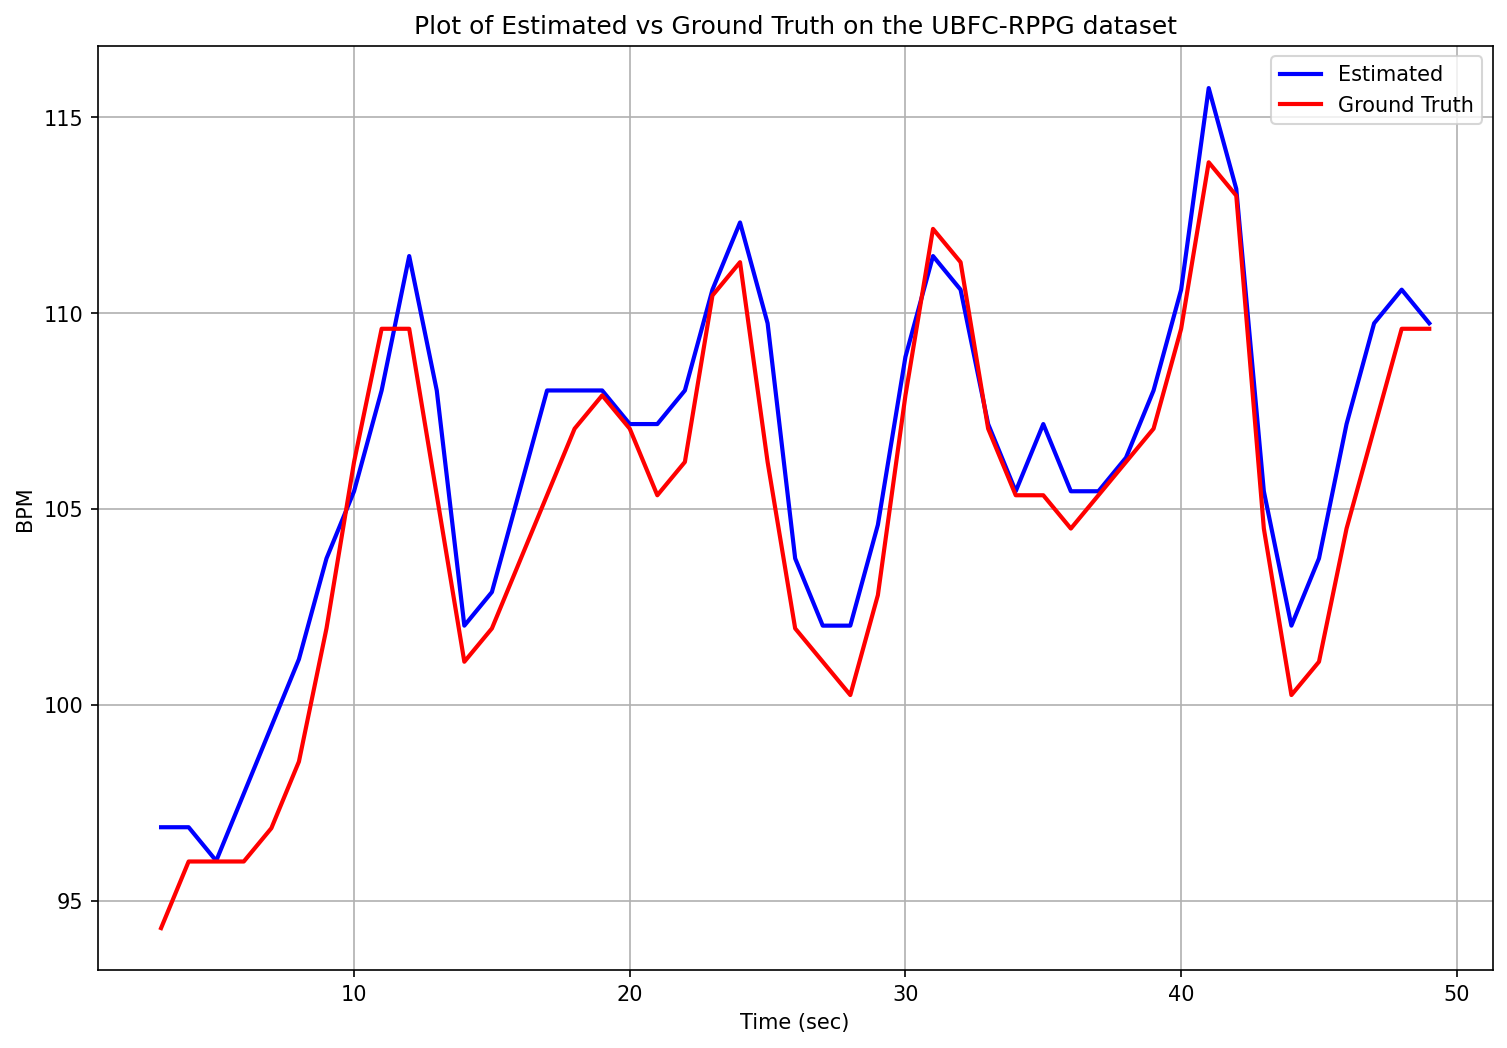

In [24]:
plt.figure(figsize=(12,8), dpi=150)
plt.plot(time, BPM, color='blue', label='Estimated', linewidth =2)
plt.plot(timesGT, bpmGT, color='red', label='Ground Truth', linewidth =2)
plt.ylabel("BPM")
plt.xlabel("Time (sec)")
plt.legend()
plt.title("Plot of Estimated vs Ground Truth on the UBFC-RPPG dataset")
plt.grid(True)

plt.show()

using Deep Learning - need CUDA to run

In [17]:
from  pyVHR.analysis.pipeline import DeepPipeline 
pipe = DeepPipeline()
time, BPM = pipe.run_on_video('data/UBFC-RPPG/subject1/vid.avi', method='MTTS_CAN') 

ImportError: cannot import name 'DeepPipeline' from 'pyVHR.analysis.pipeline' (/Users/doyin/miniconda3/envs/vhr/lib/python3.10/site-packages/pyVHR/analysis/pipeline.py)